In [16]:
# 1
%matplotlib inline
import numpy as np
import pandas as pd
import os,sys
import utilities as utils
import matplotlib.pyplot as plt
from consts import sensor_idd as idd
from consts import sensor_unix_column as unix_column
from consts import sensor_a_temperature as a_temperature
from consts import sensor_s_temperature as s_temperature
epoch_length = 30
import pickle
import multiprocessing as mp
from multiprocessing import Pool
import time

In [2]:
df_sub = pd.read_hdf('rr_data.h5','df_sub')

In [3]:
df_sub.info("Deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21797635 entries, 0 to 347116
Data columns (total 12 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Station ID                int64  
 1   Year                      float64
 2   Month                     float64
 3   Day                       float64
 4   Hour                      float64
 5   Minute                    float64
 6   Second                    float64
 7   Time since the epoch [s]  float64
 8   Sequence Number           float64
 9   Ambient Temperature       float64
 10  Surface Temperature       float64
 11  Relative Humidity [%]     float64
dtypes: float64(11), int64(1)
memory usage: 2.1 GB


In [11]:
with open('rr_id_array.pkl','rb') as f:
    id_array = pickle.load(f)

with open('rr_pairs.pkl','rb') as f:
    pairs = pickle.load(f)

with open('rr_id_records_dict.pkl','rb') as f:
    id_records_dict = pickle.load(f)

In [8]:
id_array

array([  7,   8,  11,  14,  17,  19,  23,  26,  27,  31,  33,  34,  35,
        40,  46,  47,  49,  51,  55,  57,  59,  60,  61,  62,  63,  65,
        69,  70,  71,  72,  73,  75,  76,  79,  80,  81,  82,  84,  87,
        88,  89,  93,  96,  97,  98, 100, 103, 104, 109, 111, 121])

In [10]:
pairs

[[10, array([63])],
 [14, array([ 3, 23, 42])],
 [15, array([ 5, 17])],
 [20, array([47])],
 [21, array([7])],
 [22, array([27])],
 [24, array([21, 26, 41])],
 [25, array([14, 30, 39, 56])],
 [26, array([  9,  15,  18,  24,  37,  44, 105, 121])],
 [27, array([12, 45, 46])],
 [28, array([ 8, 25, 36])],
 [32, array([111])],
 [33, array([64, 75, 99])],
 [34, array([57])],
 [35, array([59])],
 [36, array([13, 40])],
 [37, array([ 34,  43, 106])],
 [41, array([61])],
 [42, array([71])],
 [43, array([65])],
 [45, array([82])],
 [46, array([62])],
 [48, array([76])],
 [51, array([51])],
 [52, array([11])],
 [53, array([ 70, 122])],
 [54, array([49, 68])],
 [57, array([60])],
 [60, array([84])],
 [61, array([81])],
 [62, array([55])],
 [63, array([66, 72])],
 [64, array([54, 73])],
 [66, array([ 32,  35,  50,  94, 107])],
 [67, array([31])],
 [68, array([69])],
 [69, array([79, 95])],
 [70, array([103])],
 [71, array([80])],
 [72, array([96])],
 [75, array([92, 97])],
 [76, array([100])],
 [77

In [12]:
id_records_dict

{3: 463366,
 5: 473401,
 7: 131753,
 8: 508506,
 9: 419401,
 10: 365048,
 11: 474258,
 12: 495806,
 13: 446626,
 14: 507791,
 15: 507981,
 17: 508058,
 18: 510324,
 19: 468463,
 21: 516111,
 23: 508496,
 24: 515165,
 25: 486527,
 26: 523660,
 27: 122838,
 30: 459515,
 31: 475734,
 32: 486101,
 33: 489204,
 34: 515546,
 35: 520571,
 36: 484879,
 37: 481248,
 39: 498798,
 40: 465524,
 41: 492508,
 42: 476141,
 43: 474557,
 44: 502059,
 45: 496420,
 46: 509826,
 47: 132309,
 49: 449340,
 50: 452121,
 51: 463746,
 53: 481535,
 54: 447130,
 55: 466390,
 56: 348901,
 57: 409707,
 59: 275774,
 60: 462547,
 61: 267775,
 62: 325345,
 63: 287042,
 64: 307468,
 65: 364818,
 66: 448698,
 68: 368898,
 69: 494813,
 70: 477651,
 71: 255942,
 72: 462363,
 73: 457270,
 75: 371510,
 76: 427241,
 79: 421204,
 80: 435960,
 81: 388750,
 82: 194407,
 84: 447777,
 85: 446444,
 87: 462860,
 88: 384518,
 89: 457590,
 92: 441339,
 93: 471416,
 94: 258488,
 95: 366746,
 96: 474777,
 97: 455939,
 98: 347117,
 99:

In [13]:
df_sub

,Station ID,Year,Month,Day,Hour,Minute,Second,Time since the epoch [s],Sequence Number,Ambient Temperature,Surface Temperature,Relative Humidity [%]
0,63,2006.0,12.0,22.0,15.0,37.0,46.0,1.166798e+09,115.0,1.74,0.163,66.879
1,63,2006.0,12.0,22.0,15.0,38.0,15.0,1.166798e+09,116.0,1.74,0.100,66.958
2,63,2006.0,12.0,22.0,15.0,38.0,44.0,1.166798e+09,117.0,1.81,0.163,66.734
3,63,2006.0,12.0,22.0,15.0,39.0,13.0,1.166798e+09,118.0,1.78,0.163,66.913
4,63,2006.0,12.0,22.0,15.0,39.0,43.0,1.166798e+09,119.0,1.83,0.287,66.816
...,...,...,...,...,...,...,...,...,...,...,...,...
347112,98,2007.0,5.0,9.0,23.0,50.0,57.0,1.178747e+09,15660.0,12.90,9.475,72.257
347113,98,2007.0,5.0,9.0,23.0,51.0,26.0,1.178747e+09,15661.0,13.00,9.350,71.877
347114,98,2007.0,5.0,9.0,23.0,52.0,25.0,1.178748e+09,15663.0,12.86,9.412,72.329
347115,98,2007.0,5.0,9.0,23.0,55.0,50.0,1.178748e+09,15670.0,13.00,9.475,71.395


In [21]:
np.min(df_sub[unix_column])

1162393768.0

In [29]:
unix_start = 1162393768
unix_end = 1178747998

In [30]:
(unix_end - unix_start)/epoch_length

545141.0

In [47]:
ts = np.arange(unix_start,unix_end,epoch_length)
print(len(ts))

545141


In [49]:
ts_records_array = np.zeros_like(ts)
for i,t in enumerate(ts):
    print('Done:\t{}'.format(i))
    tmp_df = df_sub[(df_sub[unix_column] >= t) & (df_sub[unix_column] < (t+epoch_length))]
    ts_records_array[i] = len(tmp_df)
    

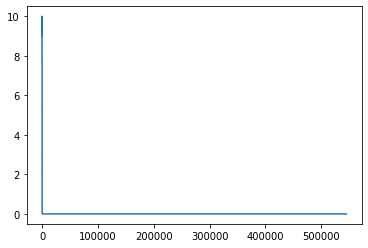

In [51]:
plt.plot(ts_records_array)

In [18]:
day_second = 86400
start_list = np.arange(1162393768,1178747998+day_second,day_second)


In [28]:
tmp_ts = np.arange(1162393768,1178747998+day_second+epoch_length,epoch_length)
print(len(tmp_ts))

548022


In [26]:
ts_sum = []
for start_point in start_list:
    ts = np.arange(start_point,start_point+day_second+epoch_length,epoch_length)
    ts_sum.extend(ts)
print(len(ts_sum))

550271
